# The Statcast Revolution
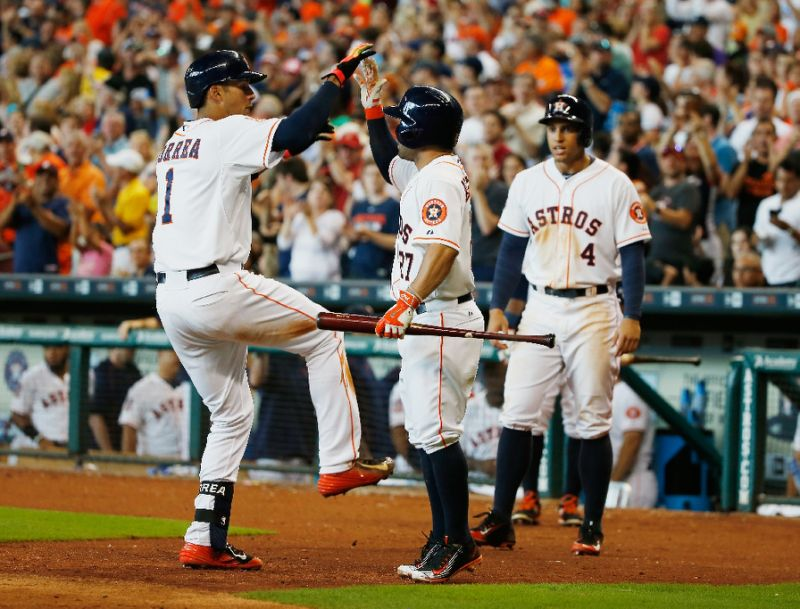
This is Aaron Judge. Judge is one of the physically largest players in Major League Baseball standing 6 feet 7 inches (2.01 m) tall and weighing 282 pounds (128 kg). He also hit the hardest home run ever recorded. How do we know this? Statcast.

Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. Introduced in 2015 to all 30 major league ballparks, Statcast data is revolutionizing the game. Teams are engaging in an "arms race" of data analysis, hiring analysts left and right in an attempt to gain an edge over their competition. This video describing the system is incredible.

In this notebook, we're going to wrangle, analyze, and visualize Statcast data to compare Mr. Judge and another (extremely large) teammate of his. Let's start by loading the data into our Notebook. There are two CSV files, judge.csv and stanton.csv, both of which contain Statcast data for 2015-2017. We'll use pandas DataFrames to store this data. Let's also load our data visualization libraries, matplotlib and seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
judge = pd.read_csv("C:/Users/UDAYAN/Desktop/Projects/Python/Statistical Analysis of Baseball/judge.csv")
display(judge.head())

pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
0         FF  9/30/2017           95.7        -2.3581         5.9240   
1         FF  9/30/2017           96.3        -2.5577         5.9023   
2         FF  9/30/2017           95.2        -2.3861         5.8346   
3         FT  9/30/2017           93.4         4.2502         4.6506   
4         FT  9/30/2017           92.8         4.1144         4.4696   

   player_name  batter  pitcher     events      description  ...  \
0  Aaron Judge  592450   608678  strikeout  swinging_strike  ...   
1  Aaron Judge  592450   608678        NaN    called_strike  ...   
2  Aaron Judge  592450   608678        NaN    called_strike  ...   
3  Aaron Judge  592450   571901       walk             ball  ...   
4  Aaron Judge  592450   571901        NaN    called_strike  ...   

   release_pos_y  estimated_ba_using_speedangle  \
0        54.0129                            0.0   
1        54.1114                            0.0   
2        54.0285                            0.0   
3        54.7309                            0.0   
4        54.5228                            0.0   

   estimated_woba_using_speedangle  woba_value  woba_denom babip_value  \
0                              0.0         0.0         1.0         0.0   
1                              0.0         NaN         NaN         NaN   
2                              0.0         NaN         NaN         NaN   
3                              0.0         0.7         1.0         0.0   
4                              0.0         NaN         NaN         NaN   

  iso_value launch_speed_angle at_bat_number pitch_number  
0       0.0                NaN            53            3  
1       NaN                NaN            53            2  
2       NaN                NaN            53            1  
3       0.0                NaN            36            5  
4       NaN                NaN            36            4  

[5 rows x 78 columns]

In [3]:
stanton = pd.read_csv("C:/Users/UDAYAN/Desktop/Projects/Python/Statistical Analysis of Baseball/stanton.csv")
stanton.head()

pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
0         SL  10/1/2017           86.4        -1.0592         5.9057   
1         FF  10/1/2017           98.1        -1.5517         5.7016   
2         FT  10/1/2017           97.0        -1.3408         5.6190   
3         FT  10/1/2017           98.0        -1.4515         5.8013   
4         FT  10/1/2017           94.2        -0.9315         7.0124   

         player_name  batter  pitcher     events      description  ...  \
0  Giancarlo Stanton  519317   527055  strikeout  swinging_strike  ...   
1  Giancarlo Stanton  519317   527055        NaN             foul  ...   
2  Giancarlo Stanton  519317   527055        NaN             foul  ...   
3  Giancarlo Stanton  519317   527055        NaN             foul  ...   
4  Giancarlo Stanton  519317   462382  field_out    hit_into_play  ...   

   release_pos_y  estimated_ba_using_speedangle  \
0        54.7356                          0.000   
1        54.9704                          0.000   
2        54.3777                          0.000   
3        54.6421                          0.000   
4        54.6464                          0.048   

   estimated_woba_using_speedangle  woba_value  woba_denom babip_value  \
0                            0.000         0.0         1.0         0.0   
1                            0.000         NaN         NaN         NaN   
2                            0.000         NaN         NaN         NaN   
3                            0.000         NaN         NaN         NaN   
4                            0.045         0.0         1.0         0.0   

  iso_value launch_speed_angle at_bat_number pitch_number  
0       0.0                NaN            80            4  
1       NaN                4.0            80            3  
2       NaN                NaN            80            2  
3       NaN                3.0            80            1  
4       0.0                2.0            64            6  

[5 rows x 78 columns]

# What can Statcast measure ?
The better question might be, what can't Statcast measure?

Starting with the pitcher, Statcast can measure simple data points such as velocity. At the same time, Statcast digs a whole lot deeper, also measuring the release point and spin rate of every pitch.

Moving on to hitters, Statcast is capable of measuring the exit velocity, launch angle and vector of the ball as it comes off the bat. From there, Statcast can also track the hang time and projected distance that a ball travels.

Let's inspect the last five rows of the judge DataFrame. You'll see that each row represents one pitch thrown to a batter. You'll also see that some columns have esoteric names. If these don't make sense now, don't worry. The relevant ones will be explained as necessary.

In [4]:
pd.set_option('display.max_columns', None)
judge.tail()

pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
3431         CH  8/13/2016           85.6        -1.9659         5.9113   
3432         CH  8/13/2016           87.6        -1.9318         5.9349   
3433         CH  8/13/2016           87.2        -2.0285         5.8656   
3434         CU  8/13/2016           79.7        -1.7108         6.1926   
3435         FF  8/13/2016           93.2        -1.8476         6.0063   

      player_name  batter  pitcher    events          description  spin_dir  \
3431  Aaron Judge  592450   542882       NaN                 ball       NaN   
3432  Aaron Judge  592450   542882  home_run  hit_into_play_score       NaN   
3433  Aaron Judge  592450   542882       NaN                 ball       NaN   
3434  Aaron Judge  592450   542882       NaN                 foul       NaN   
3435  Aaron Judge  592450   542882       NaN        called_strike       NaN   

      spin_rate_deprecated  break_angle_deprecated  break_length_deprecated  \
3431                   NaN                     NaN                      NaN   
3432                   NaN                     NaN                      NaN   
3433                   NaN                     NaN                      NaN   
3434                   NaN                     NaN                      NaN   
3435                   NaN                     NaN                      NaN   

      zone                                                des game_type stand  \
3431  14.0                                                NaN         R     R   
3432   4.0  Aaron Judge homers (1) on a fly ball to center...         R     R   
3433  14.0                                                NaN         R     R   
3434   4.0                                                NaN         R     R   
3435   8.0                                                NaN         R     R   

     p_throws home_team away_team type  hit_location   bb_type  balls  \
3431        R       NYY        TB    B           NaN       NaN      0   
3432        R       NYY        TB    X           NaN  fly_ball      1   
3433        R       NYY        TB    B           NaN       NaN      0   
3434        R       NYY        TB    S           NaN       NaN      0   
3435        R       NYY        TB    S           NaN       NaN      0   

      strikes  game_year     pfx_x     pfx_z  plate_x  plate_z  on_3b  on_2b  \
3431        0       2016 -0.379108  0.370567    0.739    1.442    NaN    NaN   
3432        2       2016 -0.295608  0.320400   -0.419    3.273    NaN    NaN   
3433        2       2016 -0.668575  0.198567    0.561    0.960    NaN    NaN   
3434        1       2016  0.397442 -0.614133   -0.803    2.742    NaN    NaN   
3435        0       2016 -0.823050  1.623300   -0.273    2.471    NaN    NaN   

      on_1b  outs_when_up  inning inning_topbot    hc_x   hc_y  \
3431    NaN             0       5           Bot     NaN    NaN   
3432    NaN             2       2           Bot  130.45  14.58   
3433    NaN             2       2           Bot     NaN    NaN   
3434    NaN             2       2           Bot     NaN    NaN   
3435    NaN             2       2           Bot     NaN    NaN   

      tfs_deprecated  tfs_zulu_deprecated  pos2_person_id  umpire  \
3431             NaN                  NaN        571912.0     NaN   
3432             NaN                  NaN        571912.0     NaN   
3433             NaN                  NaN        571912.0     NaN   
3434             NaN                  NaN        571912.0     NaN   
3435             NaN                  NaN        571912.0     NaN   

              sv_id    vx0      vy0    vz0     ax      ay      az  sz_top  \
3431  160813_144259  6.960 -124.371 -4.756 -2.821  23.634 -30.220    3.93   
3432  160813_135833  4.287 -127.452 -0.882 -1.972  24.694 -30.705    4.01   
3433  160813_135815  7.491 -126.665 -5.862 -6.393  21.952 -32.121    4.01   
3434  160813_135752  1.254 -116.062  0.439  5.184  21.328 -39.866    4.01   


# Aaron Judge and Giancarlo Stanton, prolific sluggers
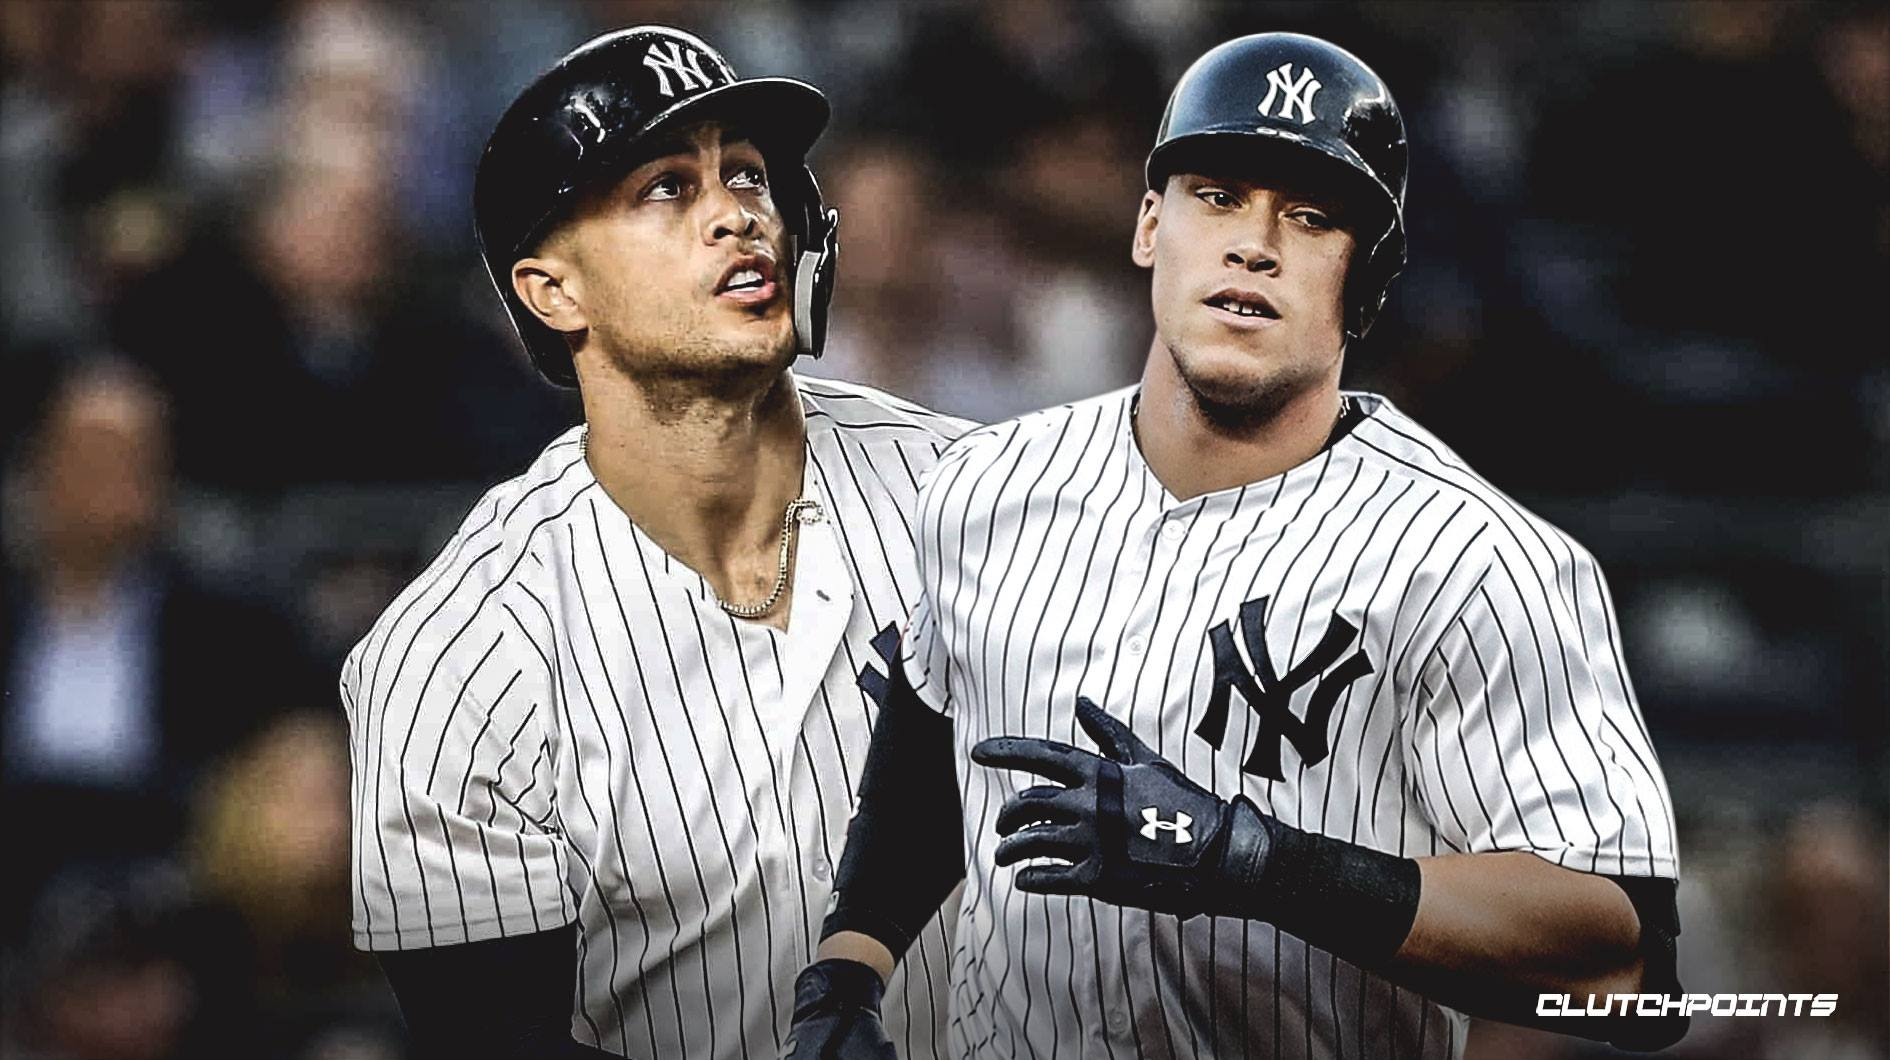
This is Giancarlo Stanton. He is also a very large human being, standing 6 feet 6 inches tall and weighing 245 pounds. Despite not wearing the same jersey as Judge in the pictures provided, in 2018 they will be teammates on the New York Yankees. They are similar in a lot of ways, one being that they hit a lot of home runs. Stanton and Judge led baseball in home runs in 2017, with 59 and 52, respectively. These are exceptional totals - the player in third "only" had 45 home runs.

Stanton and Judge are also different in many ways. One is batted ball events, which is any batted ball that produces a result. This includes outs, hits, and errors. Next, you'll find the counts of batted ball events for each player in 2017. The frequencies of other events are quite different.

In [5]:
judge_events_2017 = judge.loc[judge.game_year == 2017]['events']
print("Aaron Judge batted ball event totals, 2017: ")
print(judge_events_2017.value_counts())

Aaron Judge batted ball event totals, 2017: 
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
fielders_choice_out            4
sac_fly                        4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64


In [6]:
stanton_events_2017 = stanton[stanton.game_year == 2017].events
print("Giancarlo Stanton batted ball event totals, 2017: ")
print(stanton_events_2017.value_counts())

Giancarlo Stanton batted ball event totals, 2017: 
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly                        3
fielders_choice_out            2
strikeout_double_play          2
pickoff_1b                     1
Name: events, dtype: int64


# Analyzing home runs with Statcast data
So Judge walks and strikes out more than Stanton. Stanton flies out more than Judge. But let's get into their hitting profiles in more detail. Two of the most groundbreaking Statcast metrics are launch angle and exit velocity:

Launch angle: the vertical angle at which the ball leaves a player's bat
Exit velocity: the speed of the baseball as it comes off the bat
This new data has changed the way teams value both hitters and pitchers. Why? As per the Washington Post:

#### " Balls hit with a high launch angle are more likely to result in a hit. Hit fast enough and at the right angle, they become home runs. "

Let's look at exit velocity vs. launch angle and let's focus on home runs only (2015-2017). The first two plots show data points. The second two show smoothed contours to represent density.

In [7]:
judge_hr = judge[judge['events'] == 'home_run']
stanton_hr = stanton[stanton['events'] == 'home_run']

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

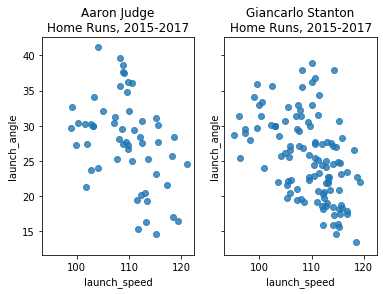

In [8]:
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')


Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

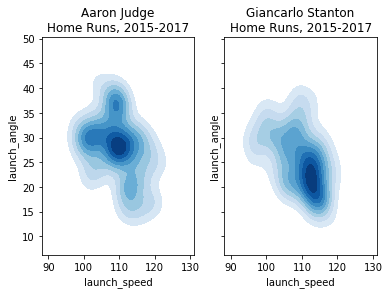

In [9]:
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr.launch_speed, judge_hr.launch_angle, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr.launch_speed, stanton_hr.launch_angle, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Home Runs by Pitch Velocity
It appears that Stanton hits his home runs slightly lower and slightly harder than Judge, though this needs to be taken with a grain of salt given the small sample size of home runs.

Not only does Statcast measure the velocity of the ball coming off of the bat, it measures the velocity of the ball coming out of the pitcher's hand and begins its journey towards the plate. We can use this data to compare Stanton and Judge's home runs in terms of pitch velocity. Next you'll find box plots displaying the five-number summaries for each player: minimum, first quartile, median, third quartile, and maximum.

Text(0.5, 1.0, 'Home Runs, 2015-2017')

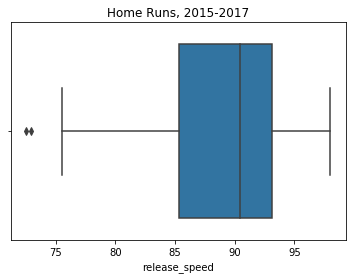

In [10]:
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])
sns.boxplot(judge_stanton_hr.release_speed).set_title("Home Runs, 2015-2017")

# Home Runs by Pitch Location (1)
So Judge appears to hit his home runs off of faster pitches than Stanton. We might call Judge a fastball hitter. Stanton appears agnostic to pitch speed and likely pitch movement since slower pitches (e.g. curveballs, sliders, and changeups) tend to have more break. Statcast does track pitch movement and type but let's move on to something else: pitch location. Statcast tracks the zone the pitch is in when it crosses the plate. The zone numbering looks like this (from the catcher's point of view):



We can plot this using a 2D histogram. For simplicity, let's only look at strikes, which gives us a 9x9 grid. We can view each zone as coordinates on a 2D plot, the bottom left corner being (1,1) and the top right corner being (3,3). Let's set up a function to assign x-coordinates to each pitch.

In [11]:
def assign_x_coord(row):
    if row.zone in [1, 4, 7]:
        return 1
    if row.zone in [2, 5, 8]:
        return 2
    if row.zone in [3, 6, 9]:
        return 3

# Home Runs by Pitch Location (2)
And let's do the same but for y-coordinates.



In [12]:
def assign_y_coord(row):
    if row.zone in [1, 2, 3]:
        return 3
    if row.zone in [4, 5, 6]:
        return 2
    if row.zone in [7, 8, 9]:
        return 1

# Aaron Judge's Home Run Zone
Now we can apply the functions we've created then construct our 2D histograms. First, for Aaron Judge (again, for pitches in the strike zone that resulted in home runs).

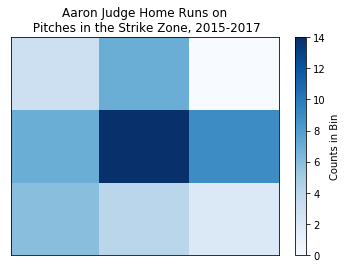

In [13]:
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# Giancarlo Stanton's Home Run Zone
And now for Giancarlo Stanton.



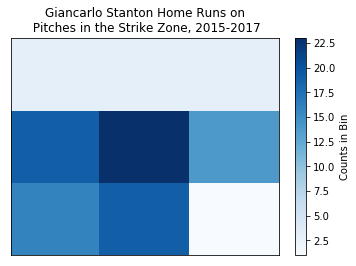

In [14]:
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)
plt.hist2d(stanton_strike_hr.zone_x, stanton_strike_hr.zone_y, bins =3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# Should opposing pitchers be scared ?
A few takeaways:

 - Stanton does not hit many home runs on pitches in the upper third of the strike zone.
 - Like pretty much every hitter ever, both players love pitches in the horizontal and vertical middle of the plate.
 - Judge's least favorite home run pitch appears to be high-away while Stanton's appears to be low-away.
 - If we were to describe Stanton's home run zone, it'd be middle-inside. Judge's home run zone is much more spread out.
The grand takeaway from this whole exercise: Aaron Judge and Giancarlo Stanton are not identical despite their superficial similarities. In terms of home runs, their launch profiles, as well as their pitch speed and location preferences, are different.

Should opposing pitchers still be scared?

In [15]:
should_pitchers_be_scared = True